# Code

In [12]:
import numpy as np
import matplotlib.pyplot as plt

## Problem Statement

#### The first part of this assignment is to write a function that transforms input intensity r to output intensity s using piecewise linear transform as given above where r is input intensity and s is output s intensity. 

#### Assume the dynamic range r is 0-100 and s is 0-250. 

#### The given control points are (0,0), (40,80) and (100,250)

#### Apply the above piece-wise linear transformation on washdc512.jpg image and show the results.

#### Then in the second part Apply Gamma-Correction using the following mapping function on the same image and show the results for various values of gamma (Assume c = 1.0 and γ = 1.5, 0.5) s = c r γ

#### a) Piecewise-Linear Transformation (Contrast Stretching)

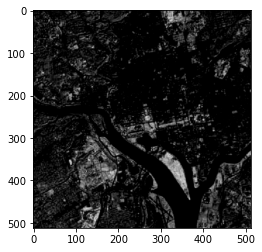

In [30]:
def pieceWise(pix, r1, s1, r2, s2):
    if(0 <= pix and pix <= r1):
        return (s1/r1)*pix
    elif(r1 < pix and pix <= r2):
        return((s2 - s1)/(r2 - r1)) * (pix - r1) + s1
    else:
        return ((250 - s2)/(250 - r2)) * (pix - r2) + s2

img = plt.imread('washdc512.jpg')

r1 = 40
s1 = 0
r2 = 100
s2 = 250

pixelValvec = np.vectorize(pieceWise)

contrastStretched = pixelValvec(img, r1, s1, r2, s2)

plt.imshow(contrastStretched, cmap = 'gray')
plt.imsave('washdc512pw.jpg', contrastStretched, cmap = 'gray' )

#### b) Implementing Gamma-Correction Factor

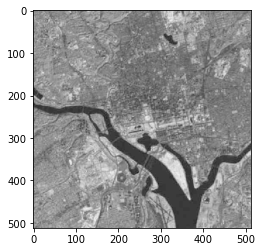

In [35]:
img = plt.imread('washdc512.jpg')

for gamma in [1.5,0.5]:
    gammaC = np.array(255*(img/255) ** gamma, dtype = 'uint8')
    plt.imshow(gammaC, cmap = 'gray')
    plt.imsave('gammaT'+str(gamma)+'.jpg', gammaC, cmap = 'gray')

